In [ ]:
import pandas as pd
import numpy as np
import string 
import re 
import nltk
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
pip install nltk

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/vaccination_tweets.csv')

In [ ]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
data.shape

(4560, 16)

In [ ]:
data.text

0       same folks said daikon paste could treat a cyt...
1       while the world has been on the wrong side of ...
2       coronavirus sputnikv astrazeneca pfizerbiontec...
3       facts are immutable senator even when youre no...
4       explain to me again why we need a vaccine bori...
                              ...                        
4555    status  hrs after  pfizerbiontech vaccine shoo...
4556    thankyou   to  roscommon vaccination team for ...
4557     covid vaccine jab administered quick easy and...
4558     vaccine jab done today very efficiently done ...
4559    is the  vaccine  safe yes deaths reported in n...
Name: text, Length: 4560, dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                4560 non-null   int64 
 1   user_name         4560 non-null   object
 2   user_location     3626 non-null   object
 3   user_description  4279 non-null   object
 4   user_created      4560 non-null   object
 5   user_followers    4560 non-null   int64 
 6   user_friends      4560 non-null   int64 
 7   user_favourites   4560 non-null   int64 
 8   user_verified     4560 non-null   bool  
 9   date              4560 non-null   object
 10  text              4560 non-null   object
 11  hashtags          3381 non-null   object
 12  source            4559 non-null   object
 13  retweets          4560 non-null   int64 
 14  favorites         4560 non-null   int64 
 15  is_retweet        4560 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 507.8+ KB


In [ ]:
data.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [ ]:
 data['user_location'].value_counts()

London, England                 70
India                           62
Canada                          51
United Arab Emirates            44
United Kingdom                  42
                                ..
She/Her                          1
Swat. Washington DC. Denver      1
Franklin, TN                     1
La Porte, IN                     1
Republic of Slovenia             1
Name: user_location, Length: 1454, dtype: int64

In [ ]:
data['user_verified'].value_counts()

False    4076
True      484
Name: user_verified, dtype: int64

In [ ]:
#get total count of data including missing data
total = data.isnull().sum().sort_values(ascending=False)

#get percent of missing data relevant to all data
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(data.shape[1])

,Total,Percent
hashtags,1179,0.258553
user_location,934,0.204825
user_description,281,0.061623
source,1,0.000219
is_retweet,0,0.000000
favorites,0,0.000000
retweets,0,0.000000
text,0,0.000000
date,0,0.000000
user_verified,0,0.000000


In [ ]:
def DataCleansing(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('<.*?>+', '', text)
    text = str(text).lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r"[^a-z]", " ", text)
    return text
    

data['text'] = data['text'].apply(lambda x:DataCleansing(x))

In [ ]:
data['text'][:20] #Reading data in a itarative way

0     same folks said daikon paste could treat a cyt...
1     while the world has been on the wrong side of ...
2     coronavirus sputnikv astrazeneca pfizerbiontec...
3     facts are immutable senator even when youre no...
4     explain to me again why we need a vaccine bori...
5     does anyone have any useful adviceguidance for...
6     it is a bit sad to claim the fame for success ...
7     there have not been many bright days in  but h...
8     covid vaccine you getting it covidvaccine  pfi...
9     covidvaccine states will start getting  monday...
10    while deaths are closing in on the  mark milli...
11    cnnbrk  covidvaccine vaccine corona pfizerbion...
12    the agency also released new information for h...
13    for all the women and healthcare providers who...
14    expect  sites across all the states to receive...
15    trump announces vaccine rollout in less than  ...
16    updated yellowfever amp  immunitypassports  pa...
17    coronavirus iran reports  new cases  death

In [ ]:
data.text.tail(20)

4540    it s been  days since i got the pfizerbiontech...
4541    philippine president rodrigoduterte said he wo...
4542    norway   considers excluding terminally ill pe...
4543    jkenney sure everyone knows trudeau heads up t...
4544    tomei hoje a segunda dose da vacina contra a  ...
4545    morning it s now about  hours post second dose...
4546    dubai    plans to inoculate  of its population...
4547    the coronavirus is a serious threat only to pe...
4548     vaccinationcentre bushey watford elstree hert...
4549    vaccinator today  giving hope to everyone  vac...
4550    a peek behind the vaccine makers curtain  pfiz...
4551    dr gregory michael died of immune thrombocytic...
4552     second pfizer vaccine dose completed this mor...
4553    spain has now started to administer second jab...
4554    union health ministry reported  cases of adver...
4555    status  hrs after  pfizerbiontech vaccine shoo...
4556    thankyou   to  roscommon vaccination team for ...
4557     covid

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

data['text'] = data['text'].apply(lambda x:remove_emoji(x))
data['text'].tail(20)

4540    it s been  days since i got the pfizerbiontech...
4541    philippine president rodrigoduterte said he wo...
4542    norway   considers excluding terminally ill pe...
4543    jkenney sure everyone knows trudeau heads up t...
4544    tomei hoje a segunda dose da vacina contra a  ...
4545    morning it s now about  hours post second dose...
4546    dubai    plans to inoculate  of its population...
4547    the coronavirus is a serious threat only to pe...
4548     vaccinationcentre bushey watford elstree hert...
4549    vaccinator today  giving hope to everyone  vac...
4550    a peek behind the vaccine makers curtain  pfiz...
4551    dr gregory michael died of immune thrombocytic...
4552     second pfizer vaccine dose completed this mor...
4553    spain has now started to administer second jab...
4554    union health ministry reported  cases of adver...
4555    status  hrs after  pfizerbiontech vaccine shoo...
4556    thankyou   to  roscommon vaccination team for ...
4557     covid

In [ ]:
new_df=pd.DataFrame()
new_df['text']=data['text']
new_df.tail(20)

,text
4540,it s been days since i got the pfizerbiontech...
4541,philippine president rodrigoduterte said he wo...
4542,norway considers excluding terminally ill pe...
4543,jkenney sure everyone knows trudeau heads up t...
4544,tomei hoje a segunda dose da vacina contra a ...
4545,morning it s now about hours post second dose...
4546,dubai plans to inoculate of its population...
4547,the coronavirus is a serious threat only to pe...
4548,vaccinationcentre bushey watford elstree hert...
4549,vaccinator today giving hope to everyone vac...


In [ ]:

fig = px.histogram(new_df, x='text', template='plotly_white', title='Visualizing the data')
fig.update_xaxes(categoryorder='total descending').update_yaxes(title='date')
fig.show()

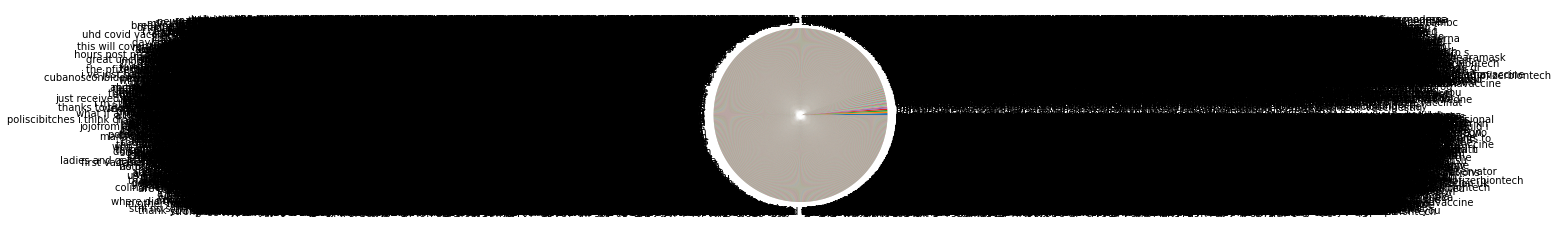

In [ ]:
new_df.text.value_counts().plot(kind='pie')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
def tokenization(txt):
    text = word_tokenize(txt)
    return text

new_df['tokenization'] = new_df['text'].apply(lambda x: tokenization(x))
new_df.head()

,text,tokenization
0,same folks said daikon paste could treat a cyt...,"[same, folks, said, daikon, paste, could, trea..."
1,while the world has been on the wrong side of ...,"[while, the, world, has, been, on, the, wrong,..."
2,coronavirus sputnikv astrazeneca pfizerbiontec...,"[coronavirus, sputnikv, astrazeneca, pfizerbio..."
3,facts are immutable senator even when youre no...,"[facts, are, immutable, senator, even, when, y..."
4,explain to me again why we need a vaccine bori...,"[explain, to, me, again, why, we, need, a, vac..."


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword] # list comprehension approach 
    return text
    
new_df['without_stopwords'] = new_df['tokenization'].apply(lambda x: remove_stopwords(x))
new_df.tail(20)


,text,tokenization,without_stopwords
4540,it s been days since i got the pfizerbiontech...,"[it, s, been, days, since, i, got, the, pfizer...","[days, since, got, pfizerbiontech, vaccine, fa..."
4541,philippine president rodrigoduterte said he wo...,"[philippine, president, rodrigoduterte, said, ...","[philippine, president, rodrigoduterte, said, ..."
4542,norway considers excluding terminally ill pe...,"[norway, considers, excluding, terminally, ill...","[norway, considers, excluding, terminally, ill..."
4543,jkenney sure everyone knows trudeau heads up t...,"[jkenney, sure, everyone, knows, trudeau, head...","[jkenney, sure, everyone, knows, trudeau, head..."
4544,tomei hoje a segunda dose da vacina contra a ...,"[tomei, hoje, a, segunda, dose, da, vacina, co...","[tomei, hoje, segunda, dose, da, vacina, contr..."
4545,morning it s now about hours post second dose...,"[morning, it, s, now, about, hours, post, seco...","[morning, hours, post, second, dose, pfizer, v..."
4546,dubai plans to inoculate of its population...,"[dubai, plans, to, inoculate, of, its, populat...","[dubai, plans, inoculate, population, pfizerbi..."
4547,the coronavirus is a serious threat only to pe...,"[the, coronavirus, is, a, serious, threat, onl...","[coronavirus, serious, threat, people, aged, y..."
4548,vaccinationcentre bushey watford elstree hert...,"[vaccinationcentre, bushey, watford, elstree, ...","[vaccinationcentre, bushey, watford, elstree, ..."
4549,vaccinator today giving hope to everyone vac...,"[vaccinator, today, giving, hope, to, everyone...","[vaccinator, today, giving, hope, everyone, va..."


In [ ]:
from nltk.stem.snowball import SnowballStemmer
snowball_stemmer = SnowballStemmer(language='english')
def stemming2(text):
    text = [snowball_stemmer.stem(word) for word in text] # list comprehension approach 
    return text
new_df['snowball_stemming'] = new_df['without_stopwords'].apply(lambda x: stemming2(x))
new_df.tail(20)

,text,tokenization,without_stopwords,snowball_stemming
4540,it s been days since i got the pfizerbiontech...,"[it, s, been, days, since, i, got, the, pfizer...","[days, since, got, pfizerbiontech, vaccine, fa...","[day, sinc, got, pfizerbiontech, vaccin, far, ..."
4541,philippine president rodrigoduterte said he wo...,"[philippine, president, rodrigoduterte, said, ...","[philippine, president, rodrigoduterte, said, ...","[philippin, presid, rodrigodutert, said, would..."
4542,norway considers excluding terminally ill pe...,"[norway, considers, excluding, terminally, ill...","[norway, considers, excluding, terminally, ill...","[norway, consid, exclud, termin, ill, peopl, r..."
4543,jkenney sure everyone knows trudeau heads up t...,"[jkenney, sure, everyone, knows, trudeau, head...","[jkenney, sure, everyone, knows, trudeau, head...","[jkenney, sure, everyon, know, trudeau, head, ..."
4544,tomei hoje a segunda dose da vacina contra a ...,"[tomei, hoje, a, segunda, dose, da, vacina, co...","[tomei, hoje, segunda, dose, da, vacina, contr...","[tomei, hoje, segunda, dose, da, vacina, contr..."
4545,morning it s now about hours post second dose...,"[morning, it, s, now, about, hours, post, seco...","[morning, hours, post, second, dose, pfizer, v...","[morn, hour, post, second, dose, pfizer, vacci..."
4546,dubai plans to inoculate of its population...,"[dubai, plans, to, inoculate, of, its, populat...","[dubai, plans, inoculate, population, pfizerbi...","[dubai, plan, inocul, popul, pfizerbiontech, e..."
4547,the coronavirus is a serious threat only to pe...,"[the, coronavirus, is, a, serious, threat, onl...","[coronavirus, serious, threat, people, aged, y...","[coronavirus, serious, threat, peopl, age, yet..."
4548,vaccinationcentre bushey watford elstree hert...,"[vaccinationcentre, bushey, watford, elstree, ...","[vaccinationcentre, bushey, watford, elstree, ...","[vaccinationcentr, bushey, watford, elstre, he..."
4549,vaccinator today giving hope to everyone vac...,"[vaccinator, today, giving, hope, to, everyone...","[vaccinator, today, giving, hope, everyone, va...","[vaccin, today, give, hope, everyon, vaccin, p..."


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
word_lem = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [word_lem.lemmatize(word) for word in text]
    return text

new_df['lemmatization'] = new_df['without_stopwords'].apply(lambda x: lemmatizer(x))
new_df.tail(20)

,text,tokenization,without_stopwords,snowball_stemming,lemmatization
4540,it s been days since i got the pfizerbiontech...,"[it, s, been, days, since, i, got, the, pfizer...","[days, since, got, pfizerbiontech, vaccine, fa...","[day, sinc, got, pfizerbiontech, vaccin, far, ...","[day, since, got, pfizerbiontech, vaccine, far..."
4541,philippine president rodrigoduterte said he wo...,"[philippine, president, rodrigoduterte, said, ...","[philippine, president, rodrigoduterte, said, ...","[philippin, presid, rodrigodutert, said, would...","[philippine, president, rodrigoduterte, said, ..."
4542,norway considers excluding terminally ill pe...,"[norway, considers, excluding, terminally, ill...","[norway, considers, excluding, terminally, ill...","[norway, consid, exclud, termin, ill, peopl, r...","[norway, considers, excluding, terminally, ill..."
4543,jkenney sure everyone knows trudeau heads up t...,"[jkenney, sure, everyone, knows, trudeau, head...","[jkenney, sure, everyone, knows, trudeau, head...","[jkenney, sure, everyon, know, trudeau, head, ...","[jkenney, sure, everyone, know, trudeau, head,..."
4544,tomei hoje a segunda dose da vacina contra a ...,"[tomei, hoje, a, segunda, dose, da, vacina, co...","[tomei, hoje, segunda, dose, da, vacina, contr...","[tomei, hoje, segunda, dose, da, vacina, contr...","[tomei, hoje, segunda, dose, da, vacina, contr..."
4545,morning it s now about hours post second dose...,"[morning, it, s, now, about, hours, post, seco...","[morning, hours, post, second, dose, pfizer, v...","[morn, hour, post, second, dose, pfizer, vacci...","[morning, hour, post, second, dose, pfizer, va..."
4546,dubai plans to inoculate of its population...,"[dubai, plans, to, inoculate, of, its, populat...","[dubai, plans, inoculate, population, pfizerbi...","[dubai, plan, inocul, popul, pfizerbiontech, e...","[dubai, plan, inoculate, population, pfizerbio..."
4547,the coronavirus is a serious threat only to pe...,"[the, coronavirus, is, a, serious, threat, onl...","[coronavirus, serious, threat, people, aged, y...","[coronavirus, serious, threat, peopl, age, yet...","[coronavirus, serious, threat, people, aged, y..."
4548,vaccinationcentre bushey watford elstree hert...,"[vaccinationcentre, bushey, watford, elstree, ...","[vaccinationcentre, bushey, watford, elstree, ...","[vaccinationcentr, bushey, watford, elstre, he...","[vaccinationcentre, bushey, watford, elstree, ..."
4549,vaccinator today giving hope to everyone vac...,"[vaccinator, today, giving, hope, to, everyone...","[vaccinator, today, giving, hope, everyone, va...","[vaccin, today, give, hope, everyon, vaccin, p...","[vaccinator, today, giving, hope, everyone, va..."


In [ ]:
pip install vaderSentiment

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import vaderSentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()


scores=[]
for i in range(len(new_df['text'])):
    score = analyser.polarity_scores(new_df['text'][i])
    score=score['compound']
    scores.append(score)
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append('Positive')
    elif i<=(-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
        
new_df['sentiment']=pd.Series(np.array(sentiment))

#print(scores)
print(max(scores))
print(min(scores))
new_df

0.936
-0.9294


,text,tokenization,without_stopwords,snowball_stemming,lemmatization,sentiment
0,same folks said daikon paste could treat a cyt...,"[same, folks, said, daikon, paste, could, trea...","[folks, said, daikon, paste, could, treat, cyt...","[folk, said, daikon, past, could, treat, cytok...","[folk, said, daikon, paste, could, treat, cyto...",Positive
1,while the world has been on the wrong side of ...,"[while, the, world, has, been, on, the, wrong,...","[world, wrong, side, history, year, hopefully,...","[world, wrong, side, histori, year, hope, bigg...","[world, wrong, side, history, year, hopefully,...",Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,"[coronavirus, sputnikv, astrazeneca, pfizerbio...","[coronavirus, sputnikv, astrazeneca, pfizerbio...","[coronavirus, sputnikv, astrazeneca, pfizerbio...","[coronavirus, sputnikv, astrazeneca, pfizerbio...",Positive
3,facts are immutable senator even when youre no...,"[facts, are, immutable, senator, even, when, y...","[facts, immutable, senator, even, youre, ethic...","[fact, immut, senat, even, your, ethic, sturdi...","[fact, immutable, senator, even, youre, ethica...",Neutral
4,explain to me again why we need a vaccine bori...,"[explain, to, me, again, why, we, need, a, vac...","[explain, need, vaccine, borisjohnson, matthan...","[explain, need, vaccin, borisjohnson, matthanc...","[explain, need, vaccine, borisjohnson, matthan...",Neutral
...,...,...,...,...,...,...
4555,status hrs after pfizerbiontech vaccine shoo...,"[status, hrs, after, pfizerbiontech, vaccine, ...","[status, hrs, pfizerbiontech, vaccine, shoot, ...","[status, hrs, pfizerbiontech, vaccin, shoot, p...","[status, hr, pfizerbiontech, vaccine, shoot, p...",Negative
4556,thankyou to roscommon vaccination team for ...,"[thankyou, to, roscommon, vaccination, team, f...","[thankyou, roscommon, vaccination, team, admin...","[thankyou, roscommon, vaccin, team, administr,...","[thankyou, roscommon, vaccination, team, admin...",Neutral
4557,covid vaccine jab administered quick easy and...,"[covid, vaccine, jab, administered, quick, eas...","[covid, vaccine, jab, administered, quick, eas...","[covid, vaccin, jab, administ, quick, easi, co...","[covid, vaccine, jab, administered, quick, eas...",Positive
4558,vaccine jab done today very efficiently done ...,"[vaccine, jab, done, today, very, efficiently,...","[vaccine, jab, done, today, efficiently, done,...","[vaccin, jab, done, today, effici, done, excel...","[vaccine, jab, done, today, efficiently, done,...",Positive


In [ ]:
pip uninstall matplotlib

Uninstalling matplotlib-3.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.4.1


In [ ]:
pip install matplotlib

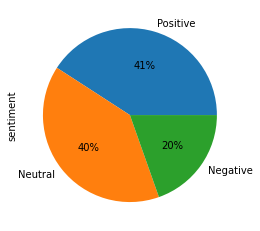

In [ ]:
new_df.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

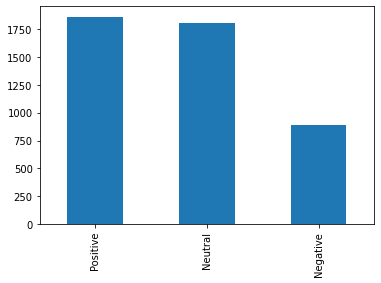

In [ ]:
new_df.sentiment.value_counts().plot(kind='bar')

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
new_df['numaric_presentatin_of_sentiment']=new_df[['sentiment']].apply(enc.fit_transform)
new_df.head(10)

,text,tokenization,without_stopwords,snowball_stemming,lemmatization,sentiment,numaric_presentatin_of_sentiment
0,same folks said daikon paste could treat a cyt...,"[same, folks, said, daikon, paste, could, trea...","[folks, said, daikon, paste, could, treat, cyt...","[folk, said, daikon, past, could, treat, cytok...","[folk, said, daikon, paste, could, treat, cyto...",Positive,2
1,while the world has been on the wrong side of ...,"[while, the, world, has, been, on, the, wrong,...","[world, wrong, side, history, year, hopefully,...","[world, wrong, side, histori, year, hope, bigg...","[world, wrong, side, history, year, hopefully,...",Negative,0
2,coronavirus sputnikv astrazeneca pfizerbiontec...,"[coronavirus, sputnikv, astrazeneca, pfizerbio...","[coronavirus, sputnikv, astrazeneca, pfizerbio...","[coronavirus, sputnikv, astrazeneca, pfizerbio...","[coronavirus, sputnikv, astrazeneca, pfizerbio...",Positive,2
3,facts are immutable senator even when youre no...,"[facts, are, immutable, senator, even, when, y...","[facts, immutable, senator, even, youre, ethic...","[fact, immut, senat, even, your, ethic, sturdi...","[fact, immutable, senator, even, youre, ethica...",Neutral,1
4,explain to me again why we need a vaccine bori...,"[explain, to, me, again, why, we, need, a, vac...","[explain, need, vaccine, borisjohnson, matthan...","[explain, need, vaccin, borisjohnson, matthanc...","[explain, need, vaccine, borisjohnson, matthan...",Neutral,1
5,does anyone have any useful adviceguidance for...,"[does, anyone, have, any, useful, adviceguidan...","[anyone, useful, adviceguidance, whether, covi...","[anyon, use, adviceguid, whether, covid, vacci...","[anyone, useful, adviceguidance, whether, covi...",Positive,2
6,it is a bit sad to claim the fame for success ...,"[it, is, a, bit, sad, to, claim, the, fame, fo...","[bit, sad, claim, fame, success, vaccination, ...","[bit, sad, claim, fame, success, vaccin, patri...","[bit, sad, claim, fame, success, vaccination, ...",Positive,2
7,there have not been many bright days in but h...,"[there, have, not, been, many, bright, days, i...","[many, bright, days, best, bidenharris, winning]","[mani, bright, day, best, bidenharri, win]","[many, bright, day, best, bidenharris, winning]",Positive,2
8,covid vaccine you getting it covidvaccine pfi...,"[covid, vaccine, you, getting, it, covidvaccin...","[covid, vaccine, getting, covidvaccine, pfizer...","[covid, vaccin, get, covidvaccin, pfizerbionte...","[covid, vaccine, getting, covidvaccine, pfizer...",Neutral,1
9,covidvaccine states will start getting monday...,"[covidvaccine, states, will, start, getting, m...","[covidvaccine, states, start, getting, monday,...","[covidvaccin, state, start, get, monday, us, s...","[covidvaccine, state, start, getting, monday, ...",Neutral,1


Positive    1863
Neutral     1804
Negative     893
Name: sentiment, dtype: int64


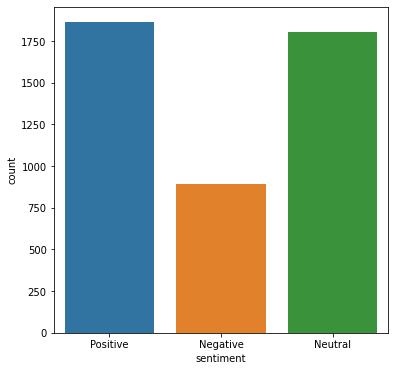

In [ ]:
#Sentiment_count_table=pd.DataFrame(new_df['numaric_presentatin_of_sentiment'].value_counts())
#Sentiment_count_table.set_index(pd.Series(['Positive','Negative','Neutral']))
import matplotlib.pyplot as plt

print(new_df['sentiment'].value_counts())
plt.figure(figsize=(6, 6))
sns.countplot(
    x='sentiment',
    data=new_df
);

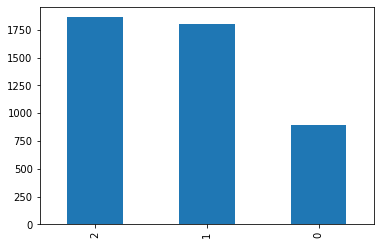

In [ ]:
new_df.numaric_presentatin_of_sentiment.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='numaric_presentatin_of_sentiment'>

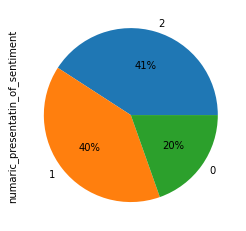

In [ ]:
new_df.numaric_presentatin_of_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
new_df['lemmatization']=[" ".join(lemmatization) for lemmatization in \
                         new_df['lemmatization'].values]
new_df['lemmatization']

0       folk said daikon paste could treat cytokine st...
1       world wrong side history year hopefully bigges...
2       coronavirus sputnikv astrazeneca pfizerbiontec...
3       fact immutable senator even youre ethically st...
4       explain need vaccine borisjohnson matthancock ...
                              ...                        
4555    status hr pfizerbiontech vaccine shoot pain in...
4556    thankyou roscommon vaccination team administra...
4557    covid vaccine jab administered quick easy comp...
4558    vaccine jab done today efficiently done excell...
4559    vaccine safe yes death reported norway followi...
Name: lemmatization, Length: 4560, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
new_df['snowball_stemming']=[" ".join(snowball_stemming) for snowball_stemming in \
                         new_df['snowball_stemming'].values]

new_df['snowball_stemming']

0       folk said daikon past could treat cytokin stor...
1       world wrong side histori year hope biggest vac...
2       coronavirus sputnikv astrazeneca pfizerbiontec...
3       fact immut senat even your ethic sturdi enough...
4       explain need vaccin borisjohnson matthancock w...
                              ...                        
4555    status hrs pfizerbiontech vaccin shoot pain in...
4556    thankyou roscommon vaccin team administr pfize...
4557    covid vaccin jab administ quick easi complet p...
4558    vaccin jab done today effici done excel work s...
4559    vaccin safe yes death report norway follow pfi...
Name: snowball_stemming, Length: 4560, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvect=TfidfVectorizer()
trans=tfvect.fit_transform(new_df['snowball_stemming'])
st_tfidf=pd.DataFrame(trans.toarray(),columns=tfvect.get_feature_names())
st_tfidf.shape
st_tfidf


,aacommun,aafp,aamp,aap,aayega,ab,abbastermezi,abbiesbrook,abbvi,abc,abcworldnew,abdullah,abil,abilo,abingtonparkmedicalcentr,abl,abort,abou,abp,abroad,abscbnnew,absenc,absolut,abund,ac,academ,acc,acceler,accept,access,accident,accomplish,accord,accordi,account,acct,accuraci,accus,acev,acevedo,...,yonomevacuno,york,yorkteachingnh,youarelobbylud,youll,young,younger,your,youranonnew,yousra,youtub,youtubecr,youtubetrend,youv,yrs,ysbyti,ysbytyenfi,yummi,yup,zab,zabeel,zahawi,zaidhamid,zanzibar,zchagla,zeclint,zeenewsenglish,zeneca,zero,zerohedg,zombi,zombieslov,zoobear,zoom,zsmu,zsuzsanna,zubymus,zuss,zuzanacaputova,zycovd
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvect=TfidfVectorizer()
trans=tfvect.fit_transform(new_df['lemmatization'])
tfidf=pd.DataFrame(trans.toarray(),columns=tfvect.get_feature_names())
tfidf.shape



(4560, 8008)

In [ ]:
from sklearn.model_selection import train_test_split
def split_dataset(x,y):
    X_train,X_test,y_train,y_test=train_test_split(x,y, random_state=100)
    return X_train,X_test,y_train,y_test

In [ ]:
X=st_tfidf
Y=new_df.numaric_presentatin_of_sentiment
X_train,X_test,y_train,y_test=split_dataset(X,Y)
Y
X
#y_test[:2]
#X_test[:2]

,aacommun,aafp,aamp,aap,aayega,ab,abbastermezi,abbiesbrook,abbvi,abc,abcworldnew,abdullah,abil,abilo,abingtonparkmedicalcentr,abl,abort,abou,abp,abroad,abscbnnew,absenc,absolut,abund,ac,academ,acc,acceler,accept,access,accident,accomplish,accord,accordi,account,acct,accuraci,accus,acev,acevedo,...,yonomevacuno,york,yorkteachingnh,youarelobbylud,youll,young,younger,your,youranonnew,yousra,youtub,youtubecr,youtubetrend,youv,yrs,ysbyti,ysbytyenfi,yummi,yup,zab,zabeel,zahawi,zaidhamid,zanzibar,zchagla,zeclint,zeenewsenglish,zeneca,zero,zerohedg,zombi,zombieslov,zoobear,zoom,zsmu,zsuzsanna,zubymus,zuss,zuzanacaputova,zycovd
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.shape,y_train.shape

((3420, 6958), (3420,))

In [ ]:
X_test.shape,y_test.shape

((1140, 6958), (1140,))

In [ ]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset

SVC(kernel='linear')

In [ ]:
from sklearn import metrics


print("Accuracy:",metrics.accuracy_score(y_train, clf.predict(X_train)))

Accuracy: 0.9497076023391813


In [ ]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, clf.predict(X_test)))

Accuracy: 0.7684210526315789


In [ ]:
pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))

[[118  81  39]
 [  7 376  48]
 [ 15  74 382]]
              precision    recall  f1-score   support

           0       0.84      0.50      0.62       238
           1       0.71      0.87      0.78       431
           2       0.81      0.81      0.81       471

    accuracy                           0.77      1140
   macro avg       0.79      0.73      0.74      1140
weighted avg       0.78      0.77      0.76      1140

0.7684210526315789


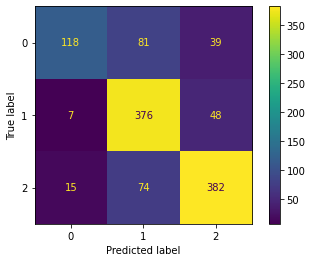

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
plot_confusion_matrix(clf,X_test,y_test)
plt.show()




In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)



RandomForestClassifier(n_estimators=200)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_train, clf.predict(X_train)))

Accuracy: 1.0


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, clf.predict(X_test)))

Accuracy: 0.7447368421052631


In [ ]:
pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))

[[ 95 107  36]
 [  7 393  31]
 [  8 102 361]]
              precision    recall  f1-score   support

           0       0.86      0.40      0.55       238
           1       0.65      0.91      0.76       431
           2       0.84      0.77      0.80       471

    accuracy                           0.74      1140
   macro avg       0.79      0.69      0.70      1140
weighted avg       0.78      0.74      0.73      1140

0.7447368421052631


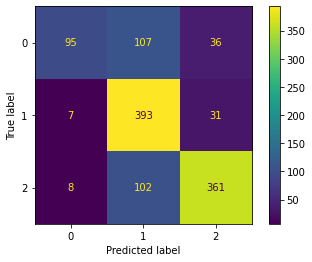

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
plot_confusion_matrix(clf,X_test,y_test)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_train, clf.predict(X_train)))

Accuracy: 1.0


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, clf.predict(X_test)))

Accuracy: 0.6780701754385965


In [ ]:
pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))

[[112  84  42]
 [ 36 339  56]
 [ 40 109 322]]
              precision    recall  f1-score   support

           0       0.60      0.47      0.53       238
           1       0.64      0.79      0.70       431
           2       0.77      0.68      0.72       471

    accuracy                           0.68      1140
   macro avg       0.67      0.65      0.65      1140
weighted avg       0.68      0.68      0.67      1140

0.6780701754385965


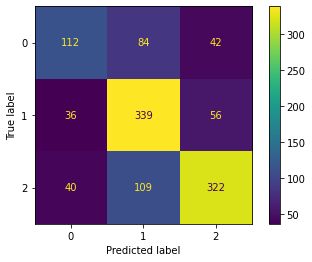

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
plot_confusion_matrix(clf,X_test,y_test)
plt.show()

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_train, clf.predict(X_train)))

Accuracy: 0.8596491228070176


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, clf.predict(X_test)))

Accuracy: 0.7157894736842105


In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7157894736842105


In [ ]:
pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))

[[ 56 106  76]
 [  4 349  78]
 [  3  57 411]]
              precision    recall  f1-score   support

           0       0.89      0.24      0.37       238
           1       0.68      0.81      0.74       431
           2       0.73      0.87      0.79       471

    accuracy                           0.72      1140
   macro avg       0.77      0.64      0.64      1140
weighted avg       0.74      0.72      0.69      1140

0.7157894736842105


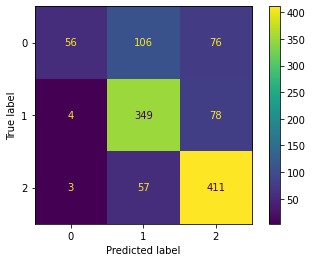

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
plot_confusion_matrix(clf,X_test,y_test)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# Train Decision Tree Classifer

clf = clf.fit(X_train,y_train)





In [ ]:
from sklearn import metrics


print("Accuracy:",metrics.accuracy_score(y_train, clf.predict(X_train)))

Accuracy: 0.9198830409356725


In [ ]:

print("Accuracy:",metrics.accuracy_score(y_test, clf.predict(X_test)))

Accuracy: 0.7508771929824561


In [ ]:
pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))

[[ 91 101  46]
 [  5 370  56]
 [  4  72 395]]
              precision    recall  f1-score   support

           0       0.91      0.38      0.54       238
           1       0.68      0.86      0.76       431
           2       0.79      0.84      0.82       471

    accuracy                           0.75      1140
   macro avg       0.80      0.69      0.70      1140
weighted avg       0.78      0.75      0.74      1140

0.7508771929824561


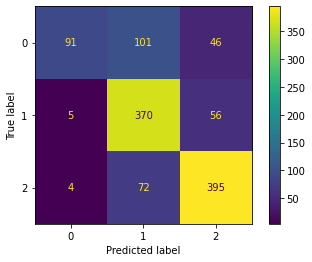

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
plot_confusion_matrix(clf,X_test,y_test)
plt.show()

**Boosting Algorithm**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, gbc_clf.predict(X_test)))

Accuracy: 0.7289473684210527


In [ ]:
gbc_clf2 = GradientBoostingClassifier(learning_rate =0.02, n_estimators =900, max_depth = 11)
gbc_clf2.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=11,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=900,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, gbc_clf.predict(X_train))

0.793859649122807

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, gbc_clf2.predict(X_test)))

Accuracy: 0.7894736842105263


In [ ]:
predictions = gbc_clf2.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

print("Accuracy")
print(accuracy_score(y_test,predictions))

Confusion Matrix:
[[126  84  28]
 [  7 395  29]
 [ 17  74 380]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.53      0.65       238
           1       0.71      0.92      0.80       431
           2       0.87      0.81      0.84       471

    accuracy                           0.79      1140
   macro avg       0.81      0.75      0.76      1140
weighted avg       0.80      0.79      0.78      1140

Accuracy
0.7903508771929825


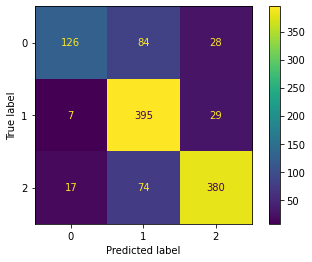

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
plot_confusion_matrix(gbc_clf2,X_test,y_test, values_format = '')
plt.show()


**XGBOOST**

In [ ]:
import xgboost as xgb

In [ ]:
xgb_clf = xgb.XGBClassifier(max_depth=7, n_estimators=170, learning_rate=0.3,
                            n_jobs=-1)

In [ ]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=170, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, xgb_clf.predict(X_train))

0.9502923976608187

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, xgb_clf.predict(X_test))

0.7824561403508772

In [ ]:
predictions = xgb_clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

print("Accuracy")
print(accuracy_score(y_test,predictions))

Confusion Matrix:
[[116  91  31]
 [  8 389  34]
 [ 15  69 387]]
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.49      0.62       238
           1       0.71      0.90      0.79       431
           2       0.86      0.82      0.84       471

    accuracy                           0.78      1140
   macro avg       0.80      0.74      0.75      1140
weighted avg       0.80      0.78      0.78      1140

Accuracy
0.7824561403508772


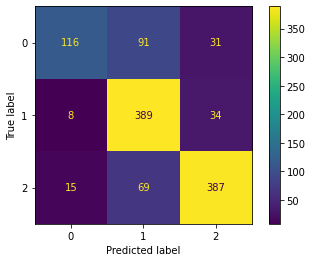

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
plot_confusion_matrix(xgb_clf,X_test,y_test, values_format = '')
plt.show()


**`Ada Boosting **


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_clf = AdaBoostClassifier(learning_rate =0.02, n_estimators =3500)

In [ ]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.02,
                   n_estimators=3500, random_state=None)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_train, ada_clf.predict(X_train))

0.8146198830409357

In [ ]:
accuracy_score(y_test, ada_clf.predict(X_test))

0.7482456140350877

In [ ]:
predictions = ada_clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

print("Accuracy")
print(accuracy_score(y_test,predictions))

Confusion Matrix:
[[ 95  94  49]
 [  8 408  15]
 [ 14 107 350]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.40      0.54       238
           1       0.67      0.95      0.78       431
           2       0.85      0.74      0.79       471

    accuracy                           0.75      1140
   macro avg       0.78      0.70      0.70      1140
weighted avg       0.77      0.75      0.74      1140

Accuracy
0.7482456140350877


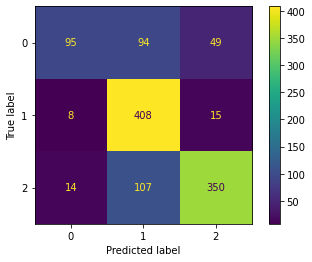

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
plot_confusion_matrix(ada_clf,X_test,y_test, values_format = '')
plt.show()